<a href="https://colab.research.google.com/github/julika333/TMS-DS/blob/main/lesson_22_PCA_LDA_tSNE/HW_22_PCA_TSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from pathlib import Path
import urllib.request
colab_path = Path("datasets/CC_GENERAL.csv")
Path("datasets").mkdir(parents=True, exist_ok=True)
url = "https://raw.githubusercontent.com/julika333/TMS-DS/main/lesson_22_PCA_LDA_tSNE/CC_GENERAL.csv"
urllib.request.urlretrieve(url, colab_path)

(PosixPath('datasets/CC_GENERAL.csv'),
 <http.client.HTTPMessage at 0x7a6e1272f760>)

In [29]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#Загружаем данные

In [30]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import matplotlib.pyplot as plt

data = pd.read_csv(Path("/content/datasets/CC_GENERAL.csv"))
# print(data.head())
print("\n***Data Info***\n")
data.info()


***Data Info***

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   i

In [12]:
data.isnull().sum(axis=0)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [36]:
# удалим CUST_ID
if  "CUST_ID" in data.columns:
  data.drop(['CUST_ID'] , axis=1, inplace = True)
# проверим MINIMUM_PAYMENTS и CREDIT_LIMIT на пустые значения
# CREDIT_LIMIT пока удалим, потом подумаем что с ней сделать
data.dropna(subset = ['CREDIT_LIMIT'], inplace=True)
data.fillna(data.median(), inplace=True)

data.isnull().sum(axis=0)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

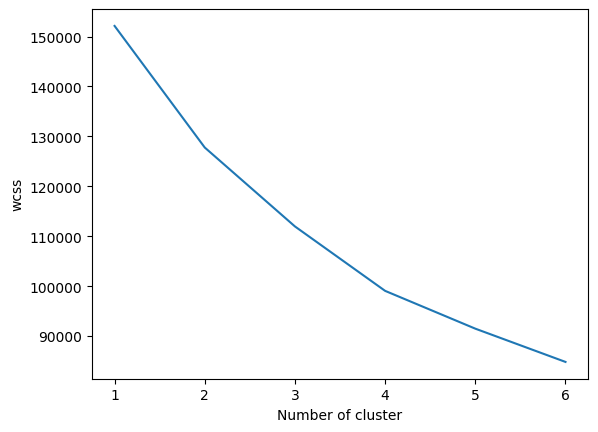

In [41]:
# стандартизируем
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# выбираем количество кластеров
wcss = {}
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, random_state=33, n_init=10).fit(data_scaled)
    wcss[k] = kmeans.inertia_  #сумма квадратов расстояний

plt.figure()
plt.plot(list(wcss.keys()), list(wcss.values()))
plt.xlabel("Number of cluster")
plt.ylabel("wcss")
plt.show()

судя по графику кластеров где-то 4

In [43]:
from sklearn.decomposition import PCA
# Модель для 4 кластеров
kmeans = KMeans(n_clusters=4, random_state=33,  n_init=10)
kmeans.fit(data_scaled)
cluster_labels = kmeans.labels_

In [44]:
# Визуализация с использованием t-SNE
tsne = TSNE(n_components=2, random_state=42)


In [50]:
data_tsne = tsne.fit_transform(data_scaled)

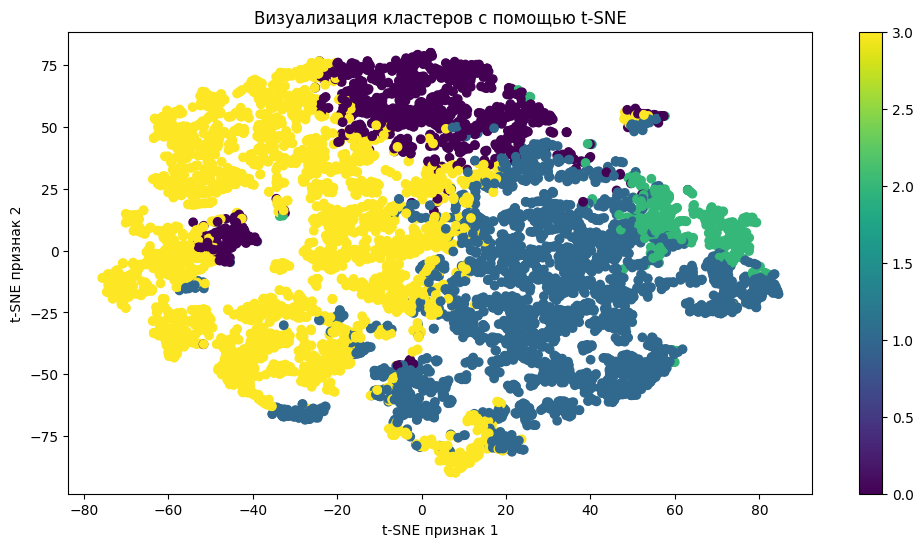

In [51]:
plt.figure(figsize=(12, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.colorbar()
plt.title('Визуализация кластеров с помощью t-SNE')
plt.xlabel('t-SNE признак 1')
plt.ylabel('t-SNE признак 2')
plt.show()

In [52]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

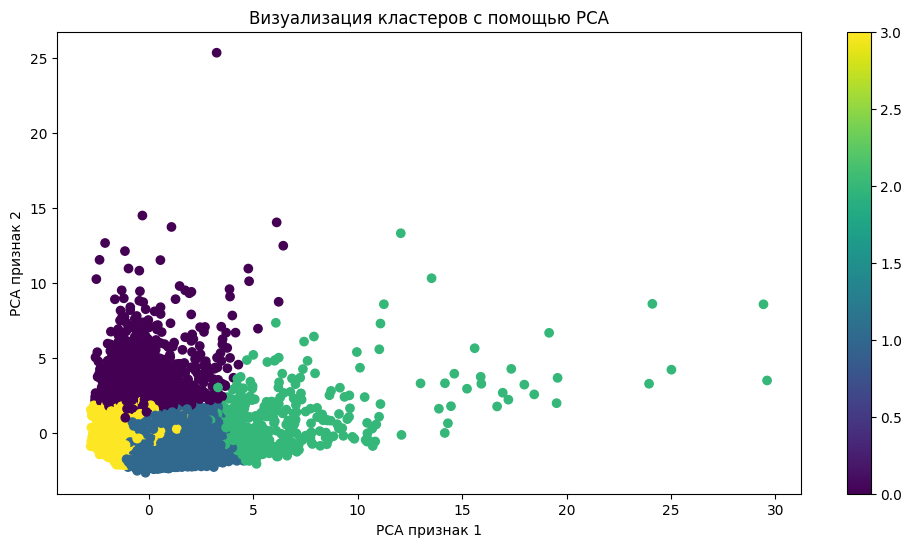

In [53]:
plt.figure(figsize=(12, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.colorbar()
plt.title('Визуализация кластеров с помощью PCA')
plt.xlabel('PCA признак 1')
plt.ylabel('PCA признак 2')
plt.show()